In [2]:
import os
os.chdir('D:/source/repos')
os.getcwd()

'D:\\source\\repos'

In [3]:
import numpy as np
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sb; sb.set()
import trading.Funds
from trading.Funds.FundReader import FundReader
from trading.Funds.DBMgr import DBMgr
from trading.Funds.Monitor import *
from trading.Funds.VisualFunds import VisualFunds

### Update database

In [3]:
Initialize()
print( dt.datetime.now().strftime('%Y-%m-%d'))
UpdateAssetsPerformance()

Initialized
2020-11-10

Updating Fund Values...

LU0072913022 662.61 561.0
LU1548497772 227.15 227.15
LU0260870158 30.23 30.23
LU0094560744 37.59 37.59
LU0366534344 247.1 247.1
IE00B530N462 20.66 20.66
LU0049842262 2873.29 2432.68
LU0011963328 50.83 31.25
LU0087412390 133.9 133.9
LU1731833304 10.18 10.18
LU1700711077 150.96 150.96
LU1594335520 113.24 113.24
LU0050372472 31.28 31.28
LU0607516092 19.76 19.76
ES0155844030 36.5 36.5
LU0503631714 274.73 274.73
LU0267388220 26.42 26.42
LU0386882277 304.37 304.37
LU0335216932 97.67 97.67
LU0026741651 831.14 769.09
LU0836513001 264.93 224.3
LU0171310443 58.33 58.33
LU0122379950 57.99 49.1
LU1684797787 327.89 277.61
LU0329931090 7.3 6.18
LU0505655562 8.68 7.35
LU0097036916 34.12 28.89
LU0260869739 22.19 22.19
IE00B29M2H10 2.85 2.85
LU0243957742 21.19 21.19
No data for  LU0306632414
IE0002639668 40.23 34.06
IE00B52VLZ70 7.05 7.05
LU0119209004 2610.23 2209.96
IE00B03HCZ61 28.49 28.49
ES0157638000 9.19 9.19
LU0996182563 193.34 193.34

Updating Sto

### Performance

#### Funds

In [4]:
dff = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 1 GROUP BY date ORDER BY date DESC'); dff.head(10)

,date,purchase,current,diff
0,2020-11-10,100532,123987,23455
0,2020-11-09,96546,118756,22210
0,2020-11-08,96546,118843,22297
0,2020-11-06,96546,118666,22120
0,2020-11-05,96546,116469,19923
0,2020-11-04,96546,114784,18238
0,2020-11-03,96546,113405,16859
0,2020-11-02,96546,112619,16073
0,2020-11-01,96546,112663,16117
0,2020-10-30,96546,113658,17112


#### Stocks

In [5]:
dfs = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 2 GROUP BY date ORDER BY date DESC'); dfs.head(10)

,date,purchase,current,diff
0,2020-11-10,41546,56940,15394
0,2020-11-09,48209,67522,19313
0,2020-11-08,48209,64951,16742
0,2020-11-06,48209,64089,15880
0,2020-11-05,48209,64663,16454
0,2020-11-04,48209,63096,14887
0,2020-11-03,48209,62192,13983
0,2020-11-02,48209,61459,13250
0,2020-11-01,48209,60812,12603
0,2020-10-30,48209,60417,12208


#### Options

In [6]:
dfo = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 3 GROUP BY date ORDER BY date DESC'); dfo.head(10)

,date,purchase,current,diff
0,2020-11-10,250,68,-182
0,2020-11-09,1750,1316,-434
0,2020-11-08,1750,1109,-641
0,2020-11-06,1750,1145,-605
0,2020-11-05,1750,1023,-727
0,2020-11-04,1750,1023,-727
0,2020-11-03,1750,919,-831
0,2020-11-02,1750,775,-975
0,2020-11-01,1750,770,-980
0,2020-10-30,1750,881,-869


#### P&L

In [17]:
PL = vf.GetQueryRes('select date, round(sum(pleur)*100)/100 as PL from operation group by date order by date desc'); PL.head(10)
totPl = round(sum(PL['pl']))
print('Total P&L : ', totPl, '\n')
PL

Total P&L :  3388 



,date,pl
0,2020-11-10,2814.29
0,2020-01-29,573.24


#### All

In [20]:
df = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 0 GROUP BY date ORDER BY date DESC'); 
totDiff = df.iloc[0]['diff'] + totPl
print('Total Diff + P&L : ', totDiff, '\n')
df.head(10)

Total Diff + P&L :  42055.0 



,date,purchase,current,diff
0,2020-11-10,142328,180995,38667
0,2020-11-09,146505,187594,41089
0,2020-11-08,146505,184903,38398
0,2020-11-06,146505,183900,37395
0,2020-11-05,146505,182155,35650
0,2020-11-04,146505,178903,32398
0,2020-11-03,146505,176516,30011
0,2020-11-02,146505,174853,28348
0,2020-11-01,146505,174245,27740
0,2020-10-30,146505,174956,28451


In [19]:
totDiff = df.iloc[0]['diff'] + totPl
totDiff


42055.0

Text(0.5, 1.0, 'ALL')

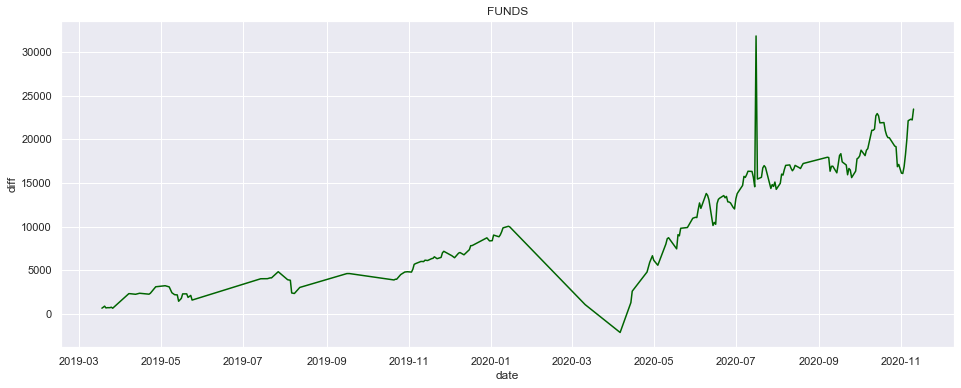

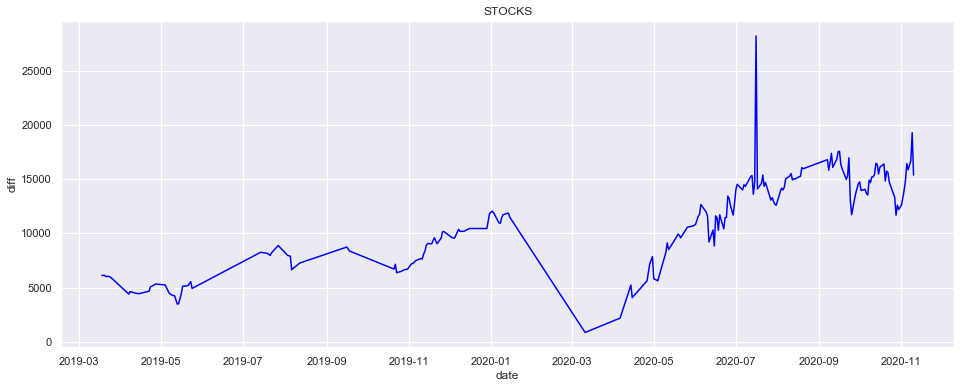

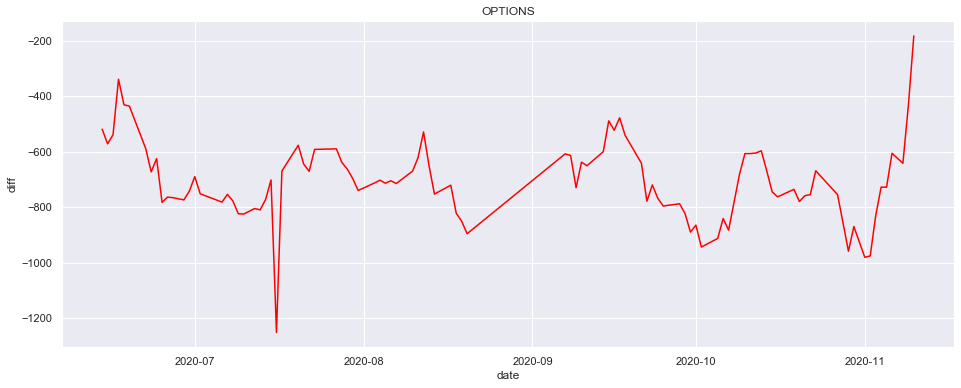

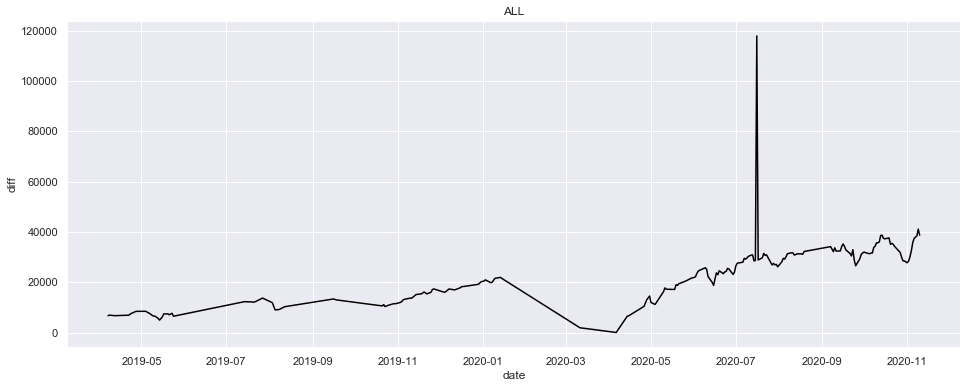

In [8]:
plt.figure(figsize=(16, 6))
dff['diff'].index = dff['date']
sb.lineplot(data=dff['diff'].astype(np.float), color="darkgreen").set_title('FUNDS')

plt.figure(figsize=(16, 6))
dfs['diff'].index = dfs['date']
sb.lineplot(data=dfs['diff'].astype(np.float), color="blue").set_title('STOCKS')

plt.figure(figsize=(16, 6))
dfo['diff'].index = dfo['date']
sb.lineplot(data=dfo['diff'].astype(np.float), color="red").set_title('OPTIONS')

plt.figure(figsize=(16, 6))
df['diff'].index = df['date']
sb.lineplot(data=df['diff'].astype(np.float), color="black").set_title('ALL')

[]

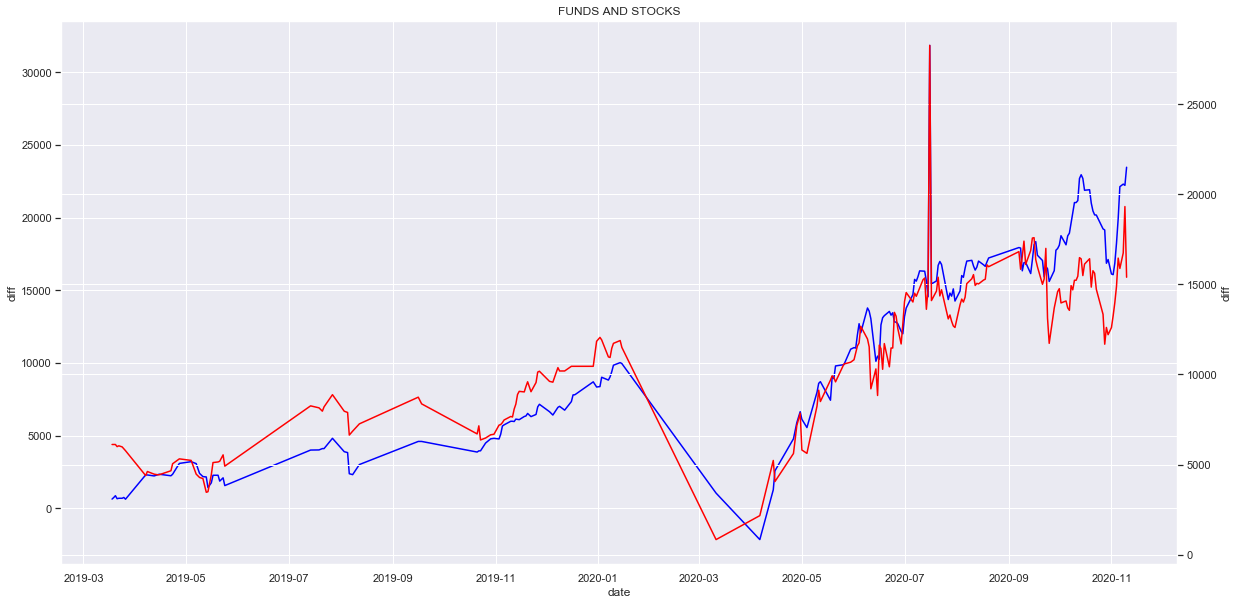

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.lineplot(data=dff['diff'].astype(np.float), color="blue")
ax2 = ax.twinx()
sb.lineplot(data=dfs['diff'].astype(np.float), color="red").set_title('FUNDS AND STOCKS')
plt.plot(figsize=(16, 6))